In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")


print("Libraries updated")


Libraries updated


In [2]:
# Load data set containing all the data from csv
df = pd.read_csv('CTU-IoT-Malware-Capture-1-1.csv')
# Describe the data, Shape and how many rows and columns
print('Number of columns in the dataframe: %i' % (df.shape[1]))
print('Number of rows in the dataframe: %i\n' % (df.shape[0]))
print(list(df.columns))
print(df['Detailed_Label'].value_counts(), '\n')


Number of columns in the dataframe: 18
Number of rows in the dataframe: 149999

['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'Detailed_Label']
HorizontalPortScan    81979
Benign                68020
Name: Detailed_Label, dtype: int64 



In [3]:
# Load data set containing all the data from csv
df2 = pd.read_csv('CTU-IoT-Malware-Capture-8-34.csv')
# Describe the data, Shape and how many rows and columns
print('Number of columns in the dataframe: %i' % (df2.shape[1]))
print('Number of rows in the dataframe: %i\n' % (df2.shape[0]))
print(list(df2.columns))
print(df2['Detailed_Label'].value_counts(), '\n')


Number of columns in the dataframe: 18
Number of rows in the dataframe: 19023

['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'Detailed_Label']
C&C       14921
Benign     4102
Name: Detailed_Label, dtype: int64 



In [4]:
# Load data set containing all the data from csv
df3 = pd.read_csv('CTU-IoT-Malware-Capture-16.csv')
# Describe the data, Shape and how many rows and columns
print('Number of columns in the dataframe: %i' % (df3.shape[1]))
print('Number of rows in the dataframe: %i\n' % (df3.shape[0]))
print(list(df3.columns))
print(df3['Detailed_Label'].value_counts(), '\n')


Number of columns in the dataframe: 18
Number of rows in the dataframe: 23288

['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'Detailed_Label']
DDoS      22735
Benign      459
C&C          94
Name: Detailed_Label, dtype: int64 



In [5]:
df = pd.concat([df, df2, df3])
print(df.shape)
print(df['Detailed_Label'].value_counts(), '\n')

print( df.head(5), '\n' )
print(df.describe(), '\n')


(192310, 18)
HorizontalPortScan    81979
Benign                72581
DDoS                  22735
C&C                   15015
Name: Detailed_Label, dtype: int64 

           ts                 uid        id.orig_h  id.orig_p  \
0  1525879831  CUmrqr4svHuSXJy5z7  192.168.100.103      51524   
1  1525879831  CH98aB3s1kJeq6SFOc  192.168.100.103      56305   
2  1525879831   C3GBTkINvXNjVGtN5  192.168.100.103      41101   
3  1525879832   CDe43c1PtgynajGI6  192.168.100.103      60905   
4  1525879832  CJaDcG3MZzvf1YVYI4  192.168.100.103      44301   

         id.resp_h id.resp_p proto  duration orig_bytes resp_bytes conn_state  \
0   65.127.233.163        23   tcp  2.999051          0          0         S0   
1    63.150.16.171        23   tcp         -          -          -         S0   
2     111.40.23.49        23   tcp         -          -          -         S0   
3  131.174.215.147        23   tcp  2.998796          0          0         S0   
4      91.42.47.63        23   tcp        

In [6]:
print(df.isnull().sum())


ts                0
uid               0
id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
proto             0
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
missed_bytes      0
history           0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
Detailed_Label    0
dtype: int64


In [7]:
#not interested columns
del df['ts']
del df['uid']
del df['id.orig_h']
del df['id.orig_p']
del df['id.resp_h']
del df['id.resp_p']
del df['proto']
#del df['local_resp']
del df['conn_state']
del df['history']

print(df.shape)


(192310, 9)


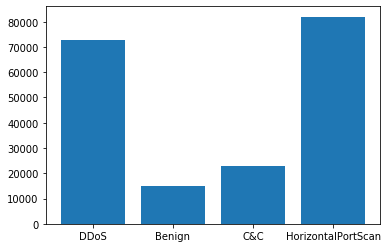

In [8]:
group_class = df.groupby('Detailed_Label').count()
plt.bar(['DDoS','Benign','C&C','HorizontalPortScan'], group_class['orig_bytes'].values)
plt.savefig('Output Malware Label Graph')
plt.show()

In [9]:
df['duration'] = df['duration'].str.replace('-','0')
df['orig_bytes'] = df['orig_bytes'].str.replace('-','0')
df['orig_bytes'] = df['orig_bytes'].str.replace('OTH','0')
df['resp_bytes'] = df['resp_bytes'].str.replace('-','0')


In [10]:
df.dropna(inplace=True)
print(df.shape)


(192310, 9)


In [11]:
print(df['Detailed_Label'].value_counts(), '\n' )
df.Detailed_Label=df.Detailed_Label.map({'Benign':0,'C&C':1,'DDoS':2,'HorizontalPortScan':3})
print(df['Detailed_Label'].value_counts(), '\n' )



HorizontalPortScan    81979
Benign                72581
DDoS                  22735
C&C                   15015
Name: Detailed_Label, dtype: int64 

3    81979
0    72581
2    22735
1    15015
Name: Detailed_Label, dtype: int64 



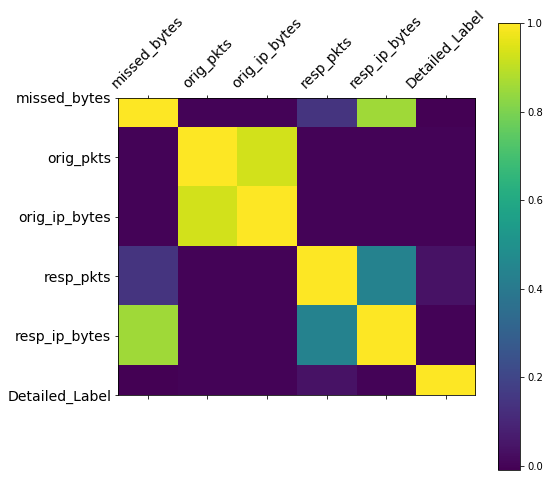

In [12]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 8
plt.matshow(df.corr())
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
plt.savefig('Feature Correlation Matrix 1')
plt.colorbar()


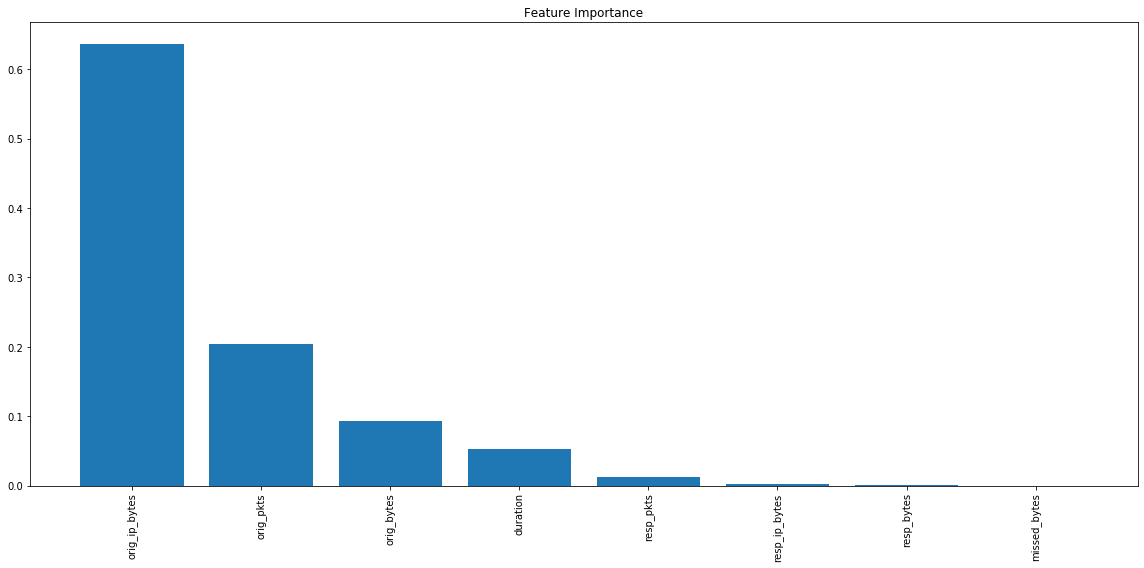

In [13]:
from sklearn.ensemble import RandomForestRegressor

X = df.iloc[:,0:8]
y = df.iloc[:,-1]  

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importances = model.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.savefig('Feature Importance')
plt.show()



In [14]:
print(df['orig_ip_bytes'].value_counts(), '\n')

60      66451
40      56053
180     33333
0       22729
76       5226
        ...  
1378        1
1208        1
738         1
1592        1
1663        1
Name: orig_ip_bytes, Length: 676, dtype: int64 



In [15]:
print(pd.crosstab(df['Detailed_Label'],df['missed_bytes']))


missed_bytes     0     2896  5792
Detailed_Label                   
0               72570     5     6
1               15015     0     0
2               22735     0     0
3               81979     0     0


In [16]:
print(pd.crosstab(df['Detailed_Label'],df['orig_ip_bytes']))


orig_ip_bytes   0           40          56          60          67          \
Detailed_Label                                                               
0                        8       56050        1332        4530          46   
1                        0           0           0        8576           0   
2                    22715           0           0           0           0   
3                        6           3           0       53345           0   

orig_ip_bytes   68          72          74          76          80          \
Detailed_Label                                                               
0                     1844           2           3        5226          25   
1                        0           0           0           0           0   
2                        0           0           0           0           0   
3                        0           0           0           0           0   

orig_ip_bytes   ...  303754740   415254422   485588064   48656

In [17]:
print(pd.crosstab(df['Detailed_Label'],df['resp_pkts']))

resp_pkts        0     1     2     3     4     5     6     7     8     9     \
Detailed_Label                                                                
0               67766  4460   302     1     3     5    16     0     2     0   
1               13282     1    42     0    51     1  1333   233    65     1   
2               22735     0     0     0     0     0     0     0     0     0   
3               78973   957    18    14   497   202     2     1    10     7   

resp_pkts       ...  81    92    96    117   184   268   285   289   340   \
Detailed_Label  ...                                                         
0               ...     1     2     1     1     1     1     0     0     0   
1               ...     0     0     0     0     0     0     1     1     1   
2               ...     0     0     0     0     0     0     0     0     0   
3               ...     0     0     0     0     0     0     0     0     0   

resp_pkts       1070  
Detailed_Label        
0               

In [18]:

X = df.iloc[:,0:8]
y = df.iloc[:,-1]


train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.1, random_state=7 )


print('\n train_X = \n', train_X)
print('\n test_X = \n', test_X)
print('\n train_y = \n', train_y)
print('\n test_y = \n', test_y)
final_test = test_X.iloc[0:15]
print('\n final_test = \n', final_test)



 train_X = 
         duration orig_bytes resp_bytes  missed_bytes  orig_pkts  \
98669          0          0          0             0          1   
25230          0          0          0             0          1   
122274         0          0          0             0          1   
84914          0          0          0             0          1   
62064          0          0          0             0          1   
...          ...        ...        ...           ...        ...   
53459   2.999043          0          0             0          3   
10742          0          0          0             0          1   
49689   2.998793          0          0             0          3   
20614          0          0          0             0          0   
61615          0          0          0             0          1   

        orig_ip_bytes  resp_pkts  resp_ip_bytes  
98669              40          0              0  
25230              40          0              0  
122274             60          

In [19]:
print("\n Machine Learning Model Build \n")

#Random Forest
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(train_X,train_y)
RF_Prediction = RF.predict(test_X)
outp = RF.predict(final_test)
print('\n', test_y[:15], '\n')
print("RF Alg Accuracy", accuracy_score(test_y,RF_Prediction), '\n')
print( "Output Prediction RF = ", outp, '\n' )



 Machine Learning Model Build 


 12803     2
20776     0
40908     3
119244    3
139958    0
32283     0
18844     1
91855     0
18021     1
116328    0
2745      3
42572     3
120165    0
101475    0
7847      0
Name: Detailed_Label, dtype: int64 

RF Alg Accuracy 0.9213769434766783 

Output Prediction RF =  [2 0 3 3 0 0 1 0 3 0 3 3 0 0 0] 



In [20]:
from sklearn.metrics import classification_report,confusion_matrix

print('Confusion Matrix: \n',confusion_matrix(test_y,RF_Prediction))
print('\n')
print('Classification Report: \n',classification_report(test_y,RF_Prediction))


Confusion Matrix: 
 [[6618    2    0  647]
 [   2  642    0  848]
 [   0    0 2271    0]
 [  12    1    0 8188]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      7267
           1       1.00      0.43      0.60      1492
           2       1.00      1.00      1.00      2271
           3       0.85      1.00      0.92      8201

    accuracy                           0.92     19231
   macro avg       0.96      0.83      0.87     19231
weighted avg       0.93      0.92      0.92     19231



In [21]:
#KNN
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(train_X,train_y)
KNN_Prediction = KNN_Model.predict(test_X)
outp = KNN_Model.predict(final_test)
print("KNN Alg Accuracy", int(accuracy_score(test_y,KNN_Prediction) *100), "Percent" )
print( "Output Prediction KNN = ", outp, '\n' )



KNN Alg Accuracy 92 Percent
Output Prediction KNN =  [2 0 3 3 0 0 1 0 3 0 3 3 0 0 0] 



In [22]:
#from sklearn.metrics import classification_report,confusion_matrix

print('Confusion Matrix: \n',confusion_matrix(test_y,KNN_Prediction))
print('\n')
print('Classification Report: \n',classification_report(test_y,KNN_Prediction))


Confusion Matrix: 
 [[6614    2    0  651]
 [   0  644    0  848]
 [   0    0 2271    0]
 [   3    0    0 8198]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      7267
           1       1.00      0.43      0.60      1492
           2       1.00      1.00      1.00      2271
           3       0.85      1.00      0.92      8201

    accuracy                           0.92     19231
   macro avg       0.96      0.84      0.87     19231
weighted avg       0.93      0.92      0.92     19231



In [23]:
#SVM
SVM_Model = svm.SVC()
SVM_Model.fit(train_X,train_y)
SVM_Prediction = SVM_Model.predict(test_X)
outp = SVM_Model.predict(final_test)
print("SVM Alg Accuracy", accuracy_score(test_y,SVM_Prediction))
print( "Output Prediction SVM = ", outp, '\n' )

SVM Alg Accuracy 0.9210129478446258
Output Prediction SVM =  [2 0 3 3 0 0 1 0 3 0 3 3 0 0 0] 



In [24]:
#from sklearn.metrics import classification_report,confusion_matrix

print('Confusion Matrix: \n',confusion_matrix(test_y,SVM_Prediction))
print('\n')
print('Classification Report: \n',classification_report(test_y,SVM_Prediction))


Confusion Matrix: 
 [[6607    1    0  659]
 [   0  636    0  856]
 [   0    0 2268    3]
 [   0    0    0 8201]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      7267
           1       1.00      0.43      0.60      1492
           2       1.00      1.00      1.00      2271
           3       0.84      1.00      0.92      8201

    accuracy                           0.92     19231
   macro avg       0.96      0.83      0.87     19231
weighted avg       0.93      0.92      0.91     19231



In [25]:
print("\n Machine Learning Model Build \n")
models=[]
models.append(("logreg",LogisticRegression()))


LR = LogisticRegression()
LR.fit(train_X,train_y)
pred = LR.predict(test_X)
outp = LR.predict(final_test)
print('\n', test_y[:10], '\n')
print("LR Alg Accuracy", accuracy_score(test_y,pred), '\n')
print( "Output Prediction = ", outp, '\n' )



 Machine Learning Model Build 


 12803     2
20776     0
40908     3
119244    3
139958    0
32283     0
18844     1
91855     0
18021     1
116328    0
Name: Detailed_Label, dtype: int64 

LR Alg Accuracy 0.4523945712651448 

Output Prediction =  [0 3 3 3 3 3 3 3 3 3 3 3 3 3 3] 

